# Série2 : Correction 
  ## Exercice 1:  

Nous avons à notre disposition les données d'échec ou de réussite de l'examen de cette matière de 2020. Nous allons nous intérésser en particulier à deux variables binaires de ces données:
- La section: **S** $\in\{\text{GM},\text{EL}\}$
- Le succes à l'examen: **A** $\in\{0,1\}$

Dans le cadre des probabilités conditionnelles, avec deux variables binaires, une erreur qui revient souvent est de penser que:
\begin{equation*} \mathbb{P}\left(\textbf{A} = 1 | \textbf{S} = \text{GM}\right) + \mathbb{P}\left(\textbf{A} = 1 | \textbf{S} = \text{EL}\right) = 1 \end{equation*}
Néanmoins, cela est généralement faux. Nous allons donc nous appliquer à montrer que cela est faux dans notre cas, ainsi que de voir quel serait la version correcte de cette équation.

In [ ]:
library(dplyr)

data <- read.csv("Success_ProbaStat.csv")

1\) Synthétiser ces données de façon à avoir le nombre d'échec ou de réussite par section.

In [ ]:
########### Solution R: ##########

Prop <- data %>% count(Section, Succes) %>% mutate(prop = prop.table(n))
Prop

Section,Succes,n,prop
<chr>,<int>,<int>,<dbl>
EL,0,11,0.04526749
EL,1,38,0.15637860
GM,0,32,0.13168724
GM,1,162,0.66666667


2\) Montrer expérimentalement que $ \mathbb{P}\left(\textbf{A} = 1 | \textbf{S} = \text{GM}\right) + \mathbb{P}\left(\textbf{A} = 1 | \textbf{S} = \text{EL}\right) \neq 1 $:

In [ ]:
########### Solution R: ##########

# Probabilité empirique d'être en GM ou en EL
prop_section <- data %>% count(Section) %>% mutate(prop = prop.table(n))
# Probabilité empirique de réussir l'examen en fonction de la section GM ou en EL
prop_succes <- Prop %>% filter(Succes == 1) %>% select(Section,prop)
# Probabilité empirique de ne pas réussir l'examen en fonction de la section GM ou en EL
prop_fail <- Prop %>% filter(Succes == 0) %>% select(Section,prop)

# Calcul de cette somme de probabilité
prob_sum <- prop_succes[1,2]/prop_section[1,3] + prop_succes[2,2]/prop_section[2,3]
prob_sum

[1] 1.610562

3\) Cette erreur est plutôt commune et vient d'une confusion avec une autre équation qui elle est correcte:
\begin{equation*}\mathbb{P}\left(\textbf{A} = 1 | \textbf{S} = \text{s}\right) + \mathbb{P}\left(\textbf{A} = 0 | \textbf{S} = \text{s}\right) = 1, \forall s\in\{\text{GM},\text{EL}\}
\end{equation*}
Vérifier expérimentalement que cette équation est correcte. 
**Solution**:  
Ce résultat est vrai de manière générale, il découle directement de la définition de la probabilité conditionnel. Sauriez-vous montrer rigoureusement pourquoi cela est vrai ?


In [ ]:
########### Solution R: ##########

EL <- prop_succes[1,2]/prop_section[1,3] + prop_fail[1,2]/prop_section[1,3]
GM <- prop_succes[2,2]/prop_section[2,3] + prop_fail[2,2]/prop_section[2,3]

EL
GM

[1] 1

[1] 1

## Exercice 2: 

Nous allons considérer quatre fonctions définies de l'ensemble $\left\{0, 1, 2, ..., 10\right\}$ dans $\mathbb{R}$. Le but de cet exercice est de vérifier lesquels de ces fonctions sont des fonctions de masses.

In [ ]:
source("fonction.r")

X = c(0,1,2,3,4,5,6,7,8,9,10)

# Vous pouvez accéder à ces quatres fonctions, f1,f2,f3,f4, de la manière suivante
f1(2)

[1] 0.25

1\) La fonction ```f1``` est-elle une fonction de masse ?

**Solution**: Oui, la fonction de ```f1``` est une fonction de masse.


In [ ]:
########### Solution R: ##########

# Vérifier si f1 est une fonction de masse
masse <- TRUE
sum_ <- 0
for (x in X){
    sum_ <- sum_ + f1(x)
    if (f1(x)<0){
        masse = FALSE
        sprintf("f1(%i) = %f < 0", x,f1(x))
    }
}

if (abs(sum_-1)>1e-06){
    masse = FALSE
}

if (masse){
    print("La fonction f1 est donc une fonction de masse")
} else{
    print("La fonction f1 n'est donc pas une fonction de masse")
}

[1] "La fonction f1 est donc une fonction de masse"


2\) La fonction ```f2``` est-elle une fonction de masse ?

**Solution**: Non, la fonction de ```f2``` n'est pas une fonction de masse car elle ne respecte pas la condition $\sum_i f_2(x_i) = 1$


In [ ]:
########### Solution R: ##########

# Vérifier si f2 est une fonction de masse
masse <- TRUE
sum_ <- 0
for (x in X){
    sum_ <- sum_ + f2(x)
    if (f2(x)<0){
        masse = FALSE
        sprintf("f2(%i) = %f < 0", x,f2(x))
    }
}

if (abs(sum_-1)>1e-06){
    masse = FALSE
}

if (masse){
    print("La fonction f2 est donc une fonction de masse")
} else{
    print("La fonction f2 n'est donc pas une fonction de masse")
}

[1] "La fonction f2 n'est donc pas une fonction de masse"


3\) La fonction ```f3``` est-elle une fonction de masse ?

**Solution**: Oui, la fonction de ```f3``` est une fonction de masse.


In [ ]:
########### Solution R: ##########

# Vérifier si f2 est une fonction de masse
masse <- TRUE
sum_ <- 0
for (x in X){
    sum_ <- sum_ + f3(x)
    if (f3(x)<0){
        masse = FALSE
        sprintf("f3(%i) = %f < 0", x,f3(x))
    }
}

if (abs(sum_-1)>1e-06){
    masse = FALSE
}

if (masse){
    print("La fonction f3 est donc une fonction de masse")
} else{
    print("La fonction f3 n'est donc pas une fonction de masse")
}

[1] "La fonction f3 est donc une fonction de masse"


4\) La fonction ```f4``` est-elle une fonction de masse ?

**Solution**: Non, la fonction de ```f4``` n'est pas une fonction de masse car elle ne respecte pas la condition $\sum_i f_4(x_i) = 1$ et on a que $f4(9) < 0$ ce qui n'est pas possible, par définition, pour une fonction de masse.


In [ ]:
########### Solution R: ##########

# Vérifier si f4 est une fonction de masse
masse <- TRUE
sum_ <- 0
for (x in X){
    sum_ <- sum_ + f4(x)
    if (f4(x)<0){
        masse = FALSE
        sprintf("f4(%i) = %f < 0", x,f4(x))
    }
}

if (abs(sum_-1)>1e-06){
    masse = FALSE
}

if (masse){
    print("La fonction f4 est donc une fonction de masse")
} else{
    print("La fonction f4 n'est donc pas une fonction de masse")
}

[1] "La fonction f4 n'est donc pas une fonction de masse"


## Exercice 3: 

Le but de cet exercice est de déterminer si les fonctions suivantes peuvent être des fonctions de répartitions.

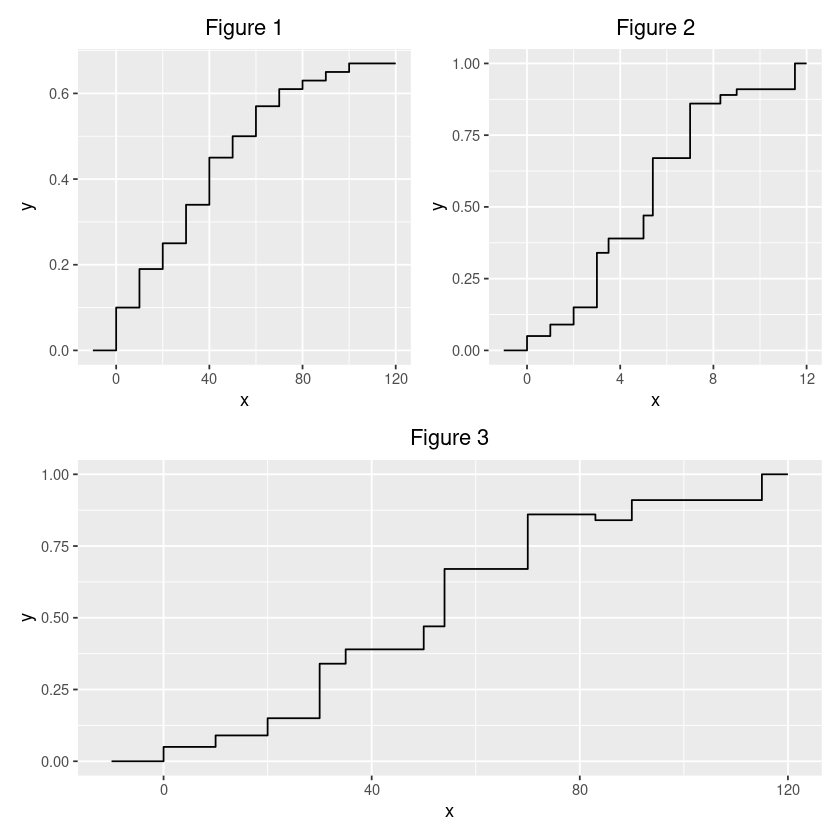

In [ ]:
library(ggplot2)
library(patchwork)

data1 <- data.frame(x=c(-10.,0.,0.,10.,10.,20.,20.,30.,30.,40.,40.,50.,50.,60.,60.,70.,70.,80.,80.,90.,90.,100.,100.,120.,120.),
            y=c(0.,0.,0.1,0.1,0.19,0.19,0.25,0.25,0.34,0.34,0.45,0.45,0.5,0.5,0.57,0.57,0.61,0.61,0.63,0.63,0.65,0.65,0.67,0.67,0.67))
data2 <- data.frame(x=0.1*c(-10.,0.,0.,10.,10.,20.,20.,30.,30.,35.,35.,50.,50.,54.,54.,70.,70.,83.,83.,90.,90.,115.,115.,120.,120.),
                    y=c(0.,0.,0.05,0.05,0.09,0.09,0.15,0.15,0.34,0.34,0.39,0.39,0.47,0.47,0.67,0.67,0.86,0.86,0.89,0.89,0.91,0.91,1.,1.,1.))
data3 <- data.frame(x=c(-10.,0.,0.,10.,10.,20.,20.,30.,30.,35.,35.,50.,50.,54.,54.,70.,70.,83.,83.,90.,90.,115.,115.,120.,120.),
                   y=c(0.,0.,0.05,0.05,0.09,0.09,0.15,0.15,0.34,0.34,0.39,0.39,0.47,0.47,0.67,0.67,0.86,0.86,0.84,0.84,0.91,0.91,1.,1.,1.))

f1 <- ggplot(data1,aes(x,y)) + geom_line() + labs(title = "Figure 1") + theme(plot.title = element_text(hjust = 0.5))
f2 <- ggplot(data2,aes(x,y)) + geom_line() + labs(title = "Figure 2") + theme(plot.title = element_text(hjust = 0.5))
f3 <- ggplot(data3,aes(x,y)) + geom_line() + labs(title = "Figure 3") + theme(plot.title = element_text(hjust = 0.5))

(f1 + f2) / f3 

1\) La Figue 1 est-elle le plot d'une fonction de répartition ?

**Solution**: Non, car $ F(x) = \Pr (X \leq x) $ implique que $ \lim_{x\to\infty} F(x) = 1 $.  

2\) La Figue 2 est-elle le plot d'une fonction de répartition ?

**Solution**: Oui. 

3\) La Figue 3 est-elle le plot d'une fonction de répartition ?

**Solution**: Non, car la fonction doit être non décroissante.


## Exercice 4: Lien entre une variable de Bernoulli et une variable géométrique

Considérons un archer, qui vise le milieu de la cible. Il tire autant de flèche que nécessaire et s'arrête une fois qu'une d'entre elle frappe le centre de la cible. On suppose qu'il parvient à atteindre son but avec une probabilité $p$ à chaque flèche et que chaque tir est indépendant des autres.
- Le fait que le $i^{ème}$ tir atteigne le centre de la cible peut alors être modéliser par la variable aléatoire $X_i \sim Bern(p)$.  
- De même, le nombre de flèches nécéssaires avant d'atteindre le centre de la cible peut être modéliser par la variable aléatoire $ S = \min\left\{{i\in\mathbb{N} | X_i = 1}\right\}$, qui suit une loi géométrique de paramètre $p$.

1\) Dans question nous allons créer une fonction ```bern``` qui génère aléatoirement une variable de Bernouilli pour un paramètre $p$ donné en argument.  
a\) En utilisant la fonction ```runif``` qui permet de générer des réalisations de variables aléatoires uniformes, et la fonction indicatrice $\mathbf{1}_{\{U<p\}}$ (où $U \sim Unif(0,1)$) écrire une fonction ```bern``` qui génère $n$ réalisations de variables de Bernoulli $X$ avec probabilité de succès $p\in[0,1]$.

In [ ]:
bern <- function(p,n){
    # Générer une variable aléatoire de Bernouilli avec probabilité de succès p
    
    X <- 1*(runif(n) < p)
    X
}

b\) En fixant $p = 0.3$, générer un grand nombre de variables de Bernoulli, disons $n = 10000$ avec la fonction ```bern``` et à l'aide d'un plot vérifier expérimentalement que $\mathbb{P}(X = 1) = 0.3$ et que $\mathbb{P}(X = 0) = 1-p = 0.7$.

**Solution**: 
Le plot ci-dessous nous permet de voir que la proportion de succès converge comme attendu vers $p = 0.3$ et que, par dualité, la proportion de d'échec converge donc vers $1-p=0.7$, comme on aurait pu s'y attendre pour une varibale $Bern(0.3)$. De même, on observe que la moyenne empirique est relativement proche de $\mathbb{E}[X] = p = 0.3$ et qu'elle se rapproche de plus en plus quand $n$ augmente. On peut donc raisonnablement penser que la variable généré est bien une Bernoulli de paramètre $p$. Nous verrons plus tard des méthodes pour obtenir une quantification de notre certitude/incertitude quant-au fait que cette fonction génère bien une variable de Bernoulli.


[1] "La moyenne de la variable générée est 0.293200"

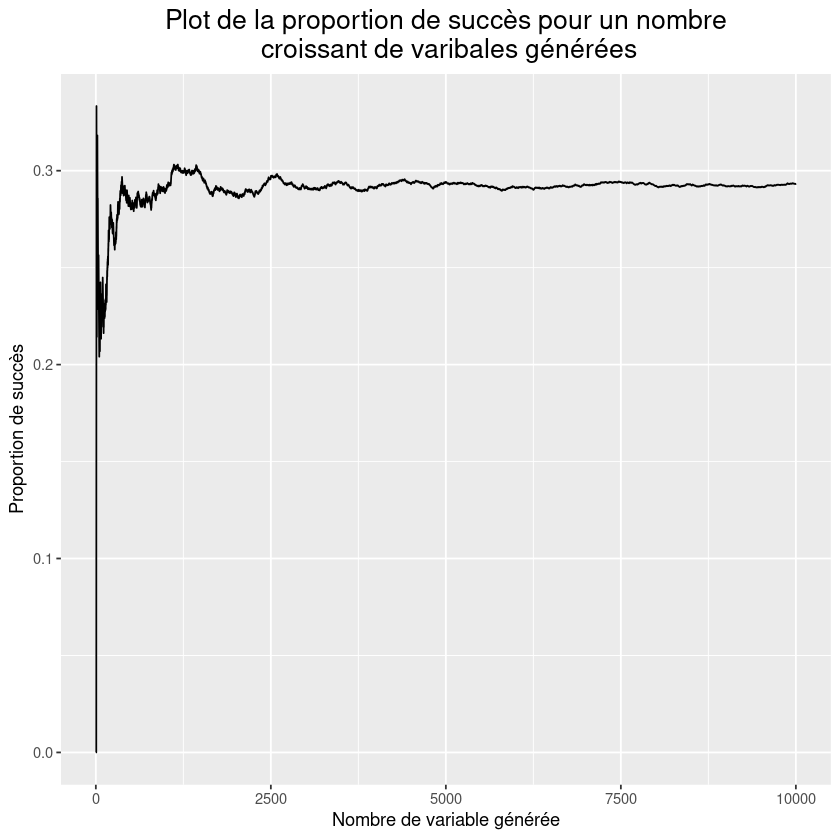

In [ ]:
library(ggplot2)

n <- 10000
p <- 0.3

# Générer n variable de Bernoulli avec probabilité de succès p
df <- data.frame(X = bern(p,n))

# Calcul de la moyenne empirique 
mean <- mean(df$X)
sprintf("La moyenne de la variable générée est %f",mean)

# Plot pour vérifier expérimentalement que la fonction bern génère bien des variables de Bernoulli
df$cumulative_prop <- cumsum(df$X)/(1:n)
df$iter <- 1:n

fig <-ggplot(df,aes(x=iter,y=cumulative_prop)) + geom_line() + 
    labs(title="Plot de la proportion de succès pour un nombre\n croissant de varibales générées", 
         x = 'Nombre de variable générée',y="Proportion de succès") +
    theme(plot.title = element_text(hjust = 0.5, size = 16))
fig

c\) Pourriez-vous envisager d'autres fonctions indicatrices pour générer une variable de Bernoulli de paramètres $p$?

**Solution**: 
Oui, on pourrait par exemple envisager la fonction indicatrice suivante : 
\begin{equation*}\mathbf{1}_{\{ \{U<\frac{p}{3}\}\cup\{U>1-\frac{2p}{3}\}\}}\end{equation*}  

On pourrait encore en envisager une infinité, le point important est la mesure (la taille) de l'intervalle sur lequel la fonction indicatrice vaut $1$ soit égal à $p$.


2\) En utilisant la fonction ```bern```, écrire une fonction ```geom``` qui simule la génération d'une variable aléatoire $S = \min\left\{{i\in\mathbb{N} | X_i = 1}\right\}$, où $X_i \sim Bern(p)$.

In [ ]:
geom <- function(p){
    if (p<1e-06){
        stop("La probabilité de succès doit être supérieure à zéro.")
    }
    
    
    S <- 1
    X <- bern(p,1)
    
    while (X != 1){
        S <- S + 1
        X <- bern(p,1)
    }
    S
    
}

3\) Nous allons maintenant estimer quelques probabilités liées à notre variable aléatoire $S$:  
a\) Grâce à un plot et une valeure numérique, estimer la valeure de $\mathbb{P}(S = 1)$ ($n = 10000$ devrait être suffisant pour une bonne estmination).  

**Solution**: 
Observe que la probabilité que notre estimation semble converger vers $p = 0.3$, qui est justement la vrai valeur de $\mathbb{P}(S = 1)$ (pour $p = 0.3$).


[1] "On estime donc cette probabilité par : 0.292500"

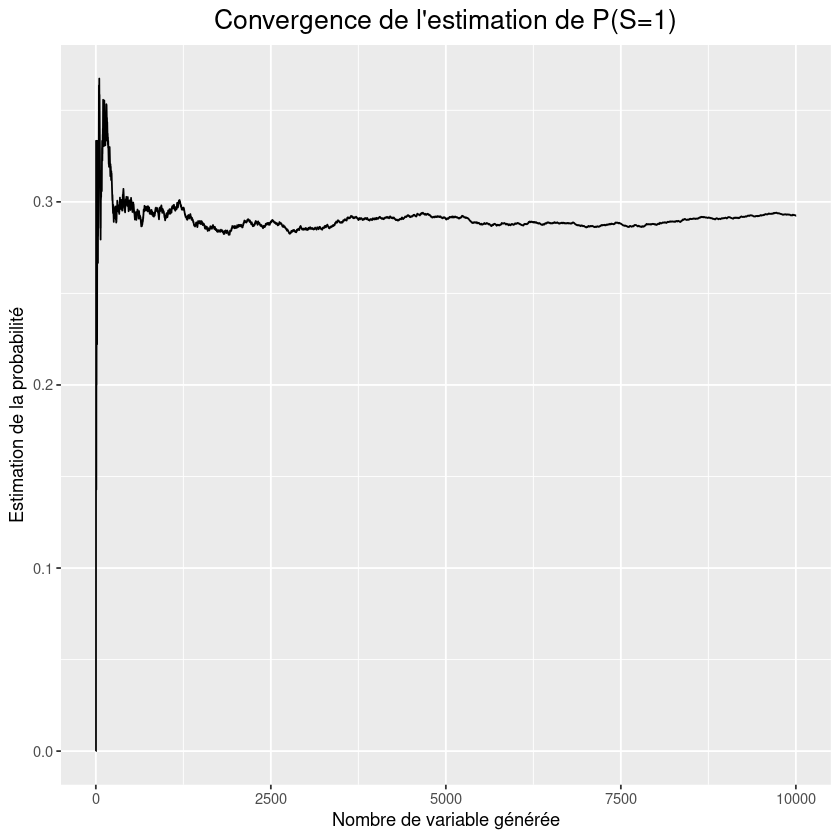

In [ ]:
n <- 10000
p <- 0.3

# Générer n observations de S
df <- data.frame(S = sapply(p*rep(1,n), FUN = geom))

# Proposer une estimation de P(S = 1)
prob1 <- sum(df$S == rep(1,n))/n
sprintf("On estime donc cette probabilité par : %f",prob1)

# Faire un plot montrant la convergence de cette probabilité
df$prob <- cumsum((df$S == rep(1,n)))/(1:n)
df$iter <- 1:n

fig <-ggplot(df,aes(x=iter,y=prob)) + geom_line() + 
    labs(title="Convergence de l'estimation de P(S=1)", 
         x = 'Nombre de variable générée',y="Estimation de la probabilité") +
    theme(plot.title = element_text(hjust = 0.5, size = 16))
fig

b\) De la même manière que la question précédente, estimer la probabilité $\mathbb{P}(S>3)$.
  
**Solution**: 
Observe que la probabilité que notre estimation semble converger vers une valeure proche de $0.34$, qui est justement proche de la vrai valeur de $\mathbb{P}(S > 3) = (1-p)^3 = 0.343$ (pour $p = 0.3$). 


[1] "On estime donc cette probabilité par : 0.338800"

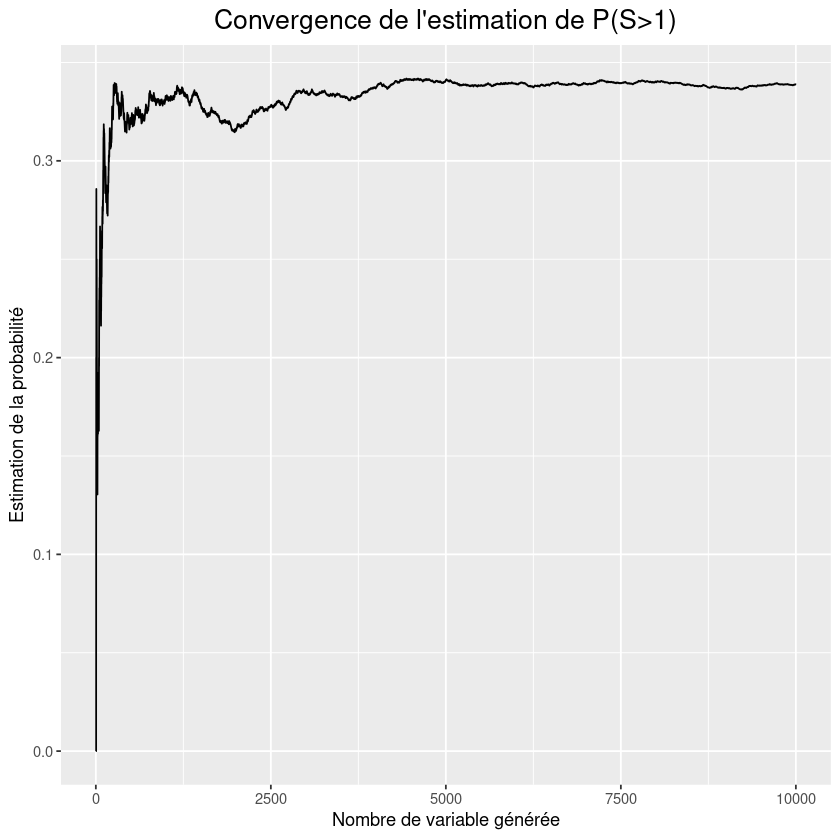

In [ ]:
n <- 10000
p <- 0.3

# Générer n observations de S
df <- data.frame(S = sapply(p*rep(1,n), FUN = geom))

# Proposer une estimation de P(S = 1)
prob2 <- sum(df$S > 3.*rep(1,n))/n
sprintf("On estime donc cette probabilité par : %f",prob2)

# Faire un plot montrant la convergence de cette probabilité
df$prob <- cumsum((df$S > 3*rep(1,n)))/(1:n)
df$iter <- 1:n

fig <-ggplot(df,aes(x=iter,y=prob)) + geom_line() + 
    labs(title="Convergence de l'estimation de P(S>1)", 
         x = 'Nombre de variable générée',y="Estimation de la probabilité") +
    theme(plot.title = element_text(hjust = 0.5, size = 16))
fig

c\) Enfin, pour des valeures $m$ et $t$ fixées, vérifier que $\mathbb{P}(S > t + m| S > t) = \mathbb{P}(S > m)$.

**Solution**: 
On observe donc ces deux valeurs convergent bien l'une vers l'autre, et que chacune convergent vers la valeurs $\mathbb{P}(S > t + m| S > t) = \mathbb{P}(S > m) = (1-p)^m = 0.489$ (pour $p = 0.3$).


[1] "On estime donc la probabilité P(S > t + m | S > t) par : 0.493775"

[1] "On estime donc la probabilité P(S > m) par : 0.487300"

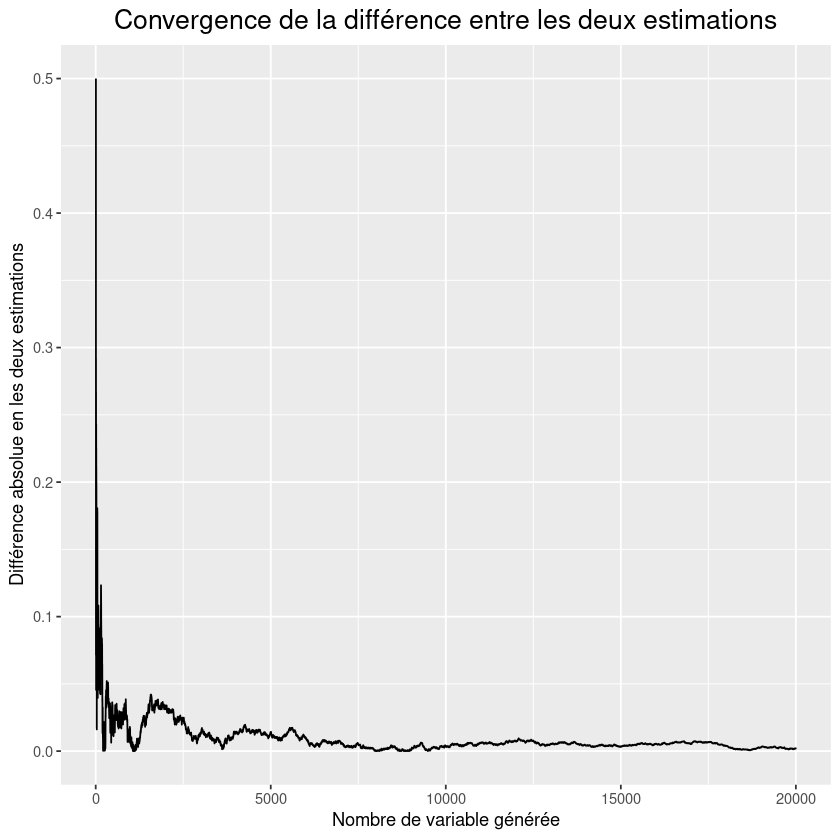

In [ ]:
n <- 20000
p <- 0.3

t <- 4
m <- 2

# Générer deux ensemble de n observations de S pour estimer chacunes de ces 
# deux probabilités avec deux ensembles distinct
df <- data.frame(S1 = sapply(p*rep(1,n), FUN = geom),S2 = sapply(p*rep(1,n), FUN = geom))

# Proposer une estimation de P(S > t + m | S > t)
prob3_1 <- sum(df$S1 > (t+m)*rep(1,n))/n
prob3_2 <- sum(df$S2 > t*rep(1,n))/n
prob3 <- prob3_1/prob3_2
sprintf("On estime donc la probabilité P(S > t + m | S > t) par : %f",prob3)

# Proposer une estimation de P(S > m)
prob3_ <- sum(df$S2 > m*rep(1,n))/n
sprintf("On estime donc la probabilité P(S > m) par : %f",prob3_)

# Faire un plot montrant la convergence de cette probabilité
p_sup_t <- cumsum((df$S1 > t*rep(1,n)))
ind <- (p_sup_t > 0)

df_ <- data.frame(iter = (1:n)[ind], 
                 diff = abs(cumsum((df$S1 > (t+m)*rep(1,n)))[ind]/cumsum((df$S1 > t*rep(1,n)))[ind]-cumsum((df$S2 > m*rep(1,n)))[ind]/(1:n)[ind]))

fig <-ggplot(df_,aes(x=iter,y=diff)) + geom_line() + 
    labs(title="Convergence de la différence entre les deux estimations", 
         x = 'Nombre de variable générée',y="Différence absolue en les deux estimations") +
    theme(plot.title = element_text(hjust = 0.5, size = 16))
fig

## Exercice 5: 

1\) Laquelle des fonctions suivantes est la densité d'une variable continue ? Reconnaissez-vous cette loi ?

**Solution**: 
Seules les deux dernières sont des fonctions de densité d'une variable continue car les deux autres ne satisfont pas $\int_{\mathbb{R}} f(x) dx = 1$. La figure 1 représente la fonction de densité d'une loi uniforme $\mathcal{U}(0,1)$.


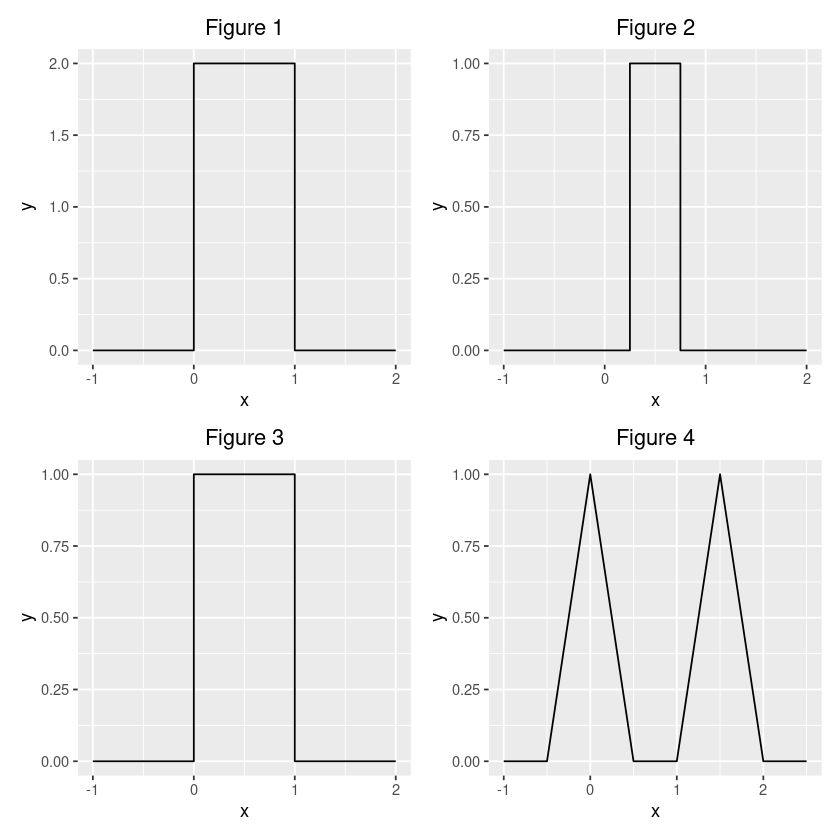

In [ ]:
library(ggplot2)
library(patchwork)

data1 <- data.frame(x=c(-1.,0.,0.,1.,1.,2.),
                    y=c(0.,0.,2.,2.,0.,0.))
data2 <- data.frame(x=c(-1.,0.25,0.25,0.75,0.75,2.),
                    y=c(0.,0.,1.,1.,0.,0.))
data3 <- data.frame(x=c(-1.,0.,0.,1.,1.,2.),
                    y=c(0.,0.,1.,1.,0.,0.))
data4 <- data.frame(x=c(-1.,-0.5,0.,0.5,1.,1.5,2.,2.5),
                    y=c(0.,0.,1.,0.,0.,1.,0.,0.))

f1 <- ggplot(data1,aes(x,y)) + geom_line() + labs(title = "Figure 1") + theme(plot.title = element_text(hjust = 0.5))
f2 <- ggplot(data2,aes(x,y)) + geom_line() + labs(title = "Figure 2") + theme(plot.title = element_text(hjust = 0.5))
f3 <- ggplot(data3,aes(x,y)) + geom_line() + labs(title = "Figure 3") + theme(plot.title = element_text(hjust = 0.5))
f4 <- ggplot(data4,aes(x,y)) + geom_line() + labs(title = "Figure 4") + theme(plot.title = element_text(hjust = 0.5))
(f1 + f2) / (f3 + f4) 

## Exercice 6: 

1\) Est-ce que les fonctions suivantes sont des fonctions de répartition? Si oui, le sont-elles pour des variables continues ou discrètes ?

**Solution**: 
- Le premier et le dernier graphique représentent des fonctions de répartition de lois discrètes.
- Le deuxième et le troisième représentent des fonctions de répartition de lois continues.
- Le quatrième graphique représente une fonction de répartition d'une loi qui est ni discrète, ni continue (c'est en fait une loi mixte).
- La fonction représentée sur le cinquième graphique n'est pas une fonction de répartition, car elle n'est pas croissante. 


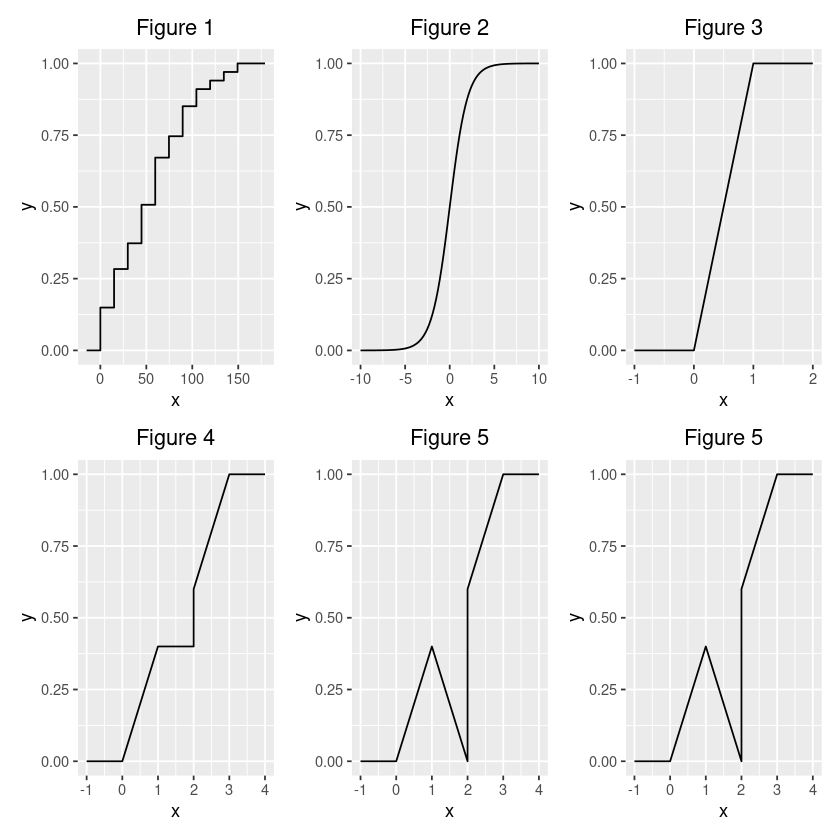

In [ ]:
library(ggplot2)
library(patchwork)

data1 <- data.frame(x=c(-10.,0.,0.,10.,10.,20.,20.,30.,30.,40.,40.,50.,50.,60.,60.,70.,70.,80.,80.,90.,90.,100.,100.,120.,120.),
                    y=c(0.,0.,0.1,0.1,0.19,0.19,0.25,0.25,0.34,0.34,0.45,0.45,0.5,0.5,0.57,0.57,0.61,0.61,0.63,0.63,0.65,0.65,0.67,0.67,0.67))/0.67
data2 <- data.frame(x=seq(-10, 10, length.out = 100),
                    y=exp(seq(-10, 10, length.out = 100))/(1+exp(seq(-10, 10, length.out = 100))))
data3 <- data.frame(x=c(-1.,0.,1.,2.),
                    y=c(0.,0.,1.,1.))
data4 <- data.frame(x=c(-1.,0,1,2,2,3,4),
                    y=c(0.,0.,0.4,0.4,0.6,1.,1))
data5 <- data.frame(x=c(-1.,0,1,2,2,3,4),
                    y=c(0.,0.,0.4,0.,0.6,1.,1))
data6 <- data.frame(x=c(-1.,0,0,1,1,2),
                    y=c(0.,0.,0.4,0.4,1.,1))

f1 <- ggplot(data1,aes(x,y)) + geom_line() + labs(title = "Figure 1") + theme(plot.title = element_text(hjust = 0.5))
f2 <- ggplot(data2,aes(x,y)) + geom_line() + labs(title = "Figure 2") + theme(plot.title = element_text(hjust = 0.5))
f3 <- ggplot(data3,aes(x,y)) + geom_line() + labs(title = "Figure 3") + theme(plot.title = element_text(hjust = 0.5))
f4 <- ggplot(data4,aes(x,y)) + geom_line() + labs(title = "Figure 4") + theme(plot.title = element_text(hjust = 0.5))
f5 <- ggplot(data5,aes(x,y)) + geom_line() + labs(title = "Figure 5") + theme(plot.title = element_text(hjust = 0.5))
f6 <- ggplot(data6,aes(x,y)) + geom_line() + labs(title = "Figure 6") + theme(plot.title = element_text(hjust = 0.5))
(f1 + f2 + f3) / (f4 + f5 + f5) 